# Введение в визуализацию данных
Основной библиотекой для визуализации данных служит **matplotlib**. Также существует надстройка над ней - **seaborn**. В ней графики покрасивее.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
students_performance = pd.read_csv("../../../Datasets/StudentsPerformance.csv")
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Самый простой способ построить график - это использовать возможности Pandas. Например нарисуем гистограмму частот распределения значений "math score":

<Axes: >

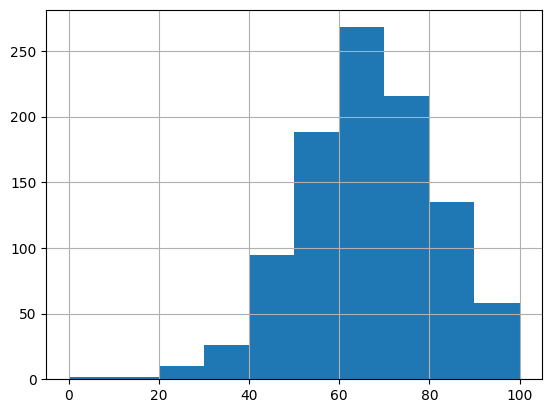

In [3]:
students_performance["math score"].hist()
# Однако даже так, метод hist() - это метод из библиотеки matplotlib

<Axes: xlabel='math score', ylabel='reading score'>

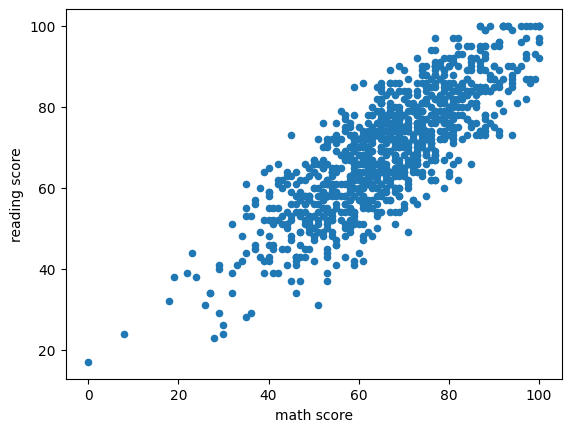

In [4]:
students_performance.plot.scatter(x="math score", y="reading score")

Этот подход хорош для быстрого и возможно предварительного исследования наших данных.
<br>Однако если мы хотим как то кастомизировать наш график, подписать оси, добавить легенду и т.д., то лучше воспользоваться seaborn.

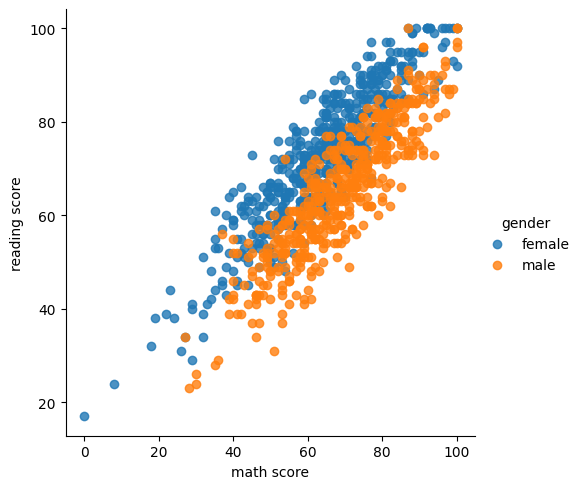

In [5]:
sns.lmplot(\
    x="math score", \
    y="reading score", \
    hue="gender", \
    data=students_performance, \
    fit_reg=False
    )


Также можем изменить названия осей:

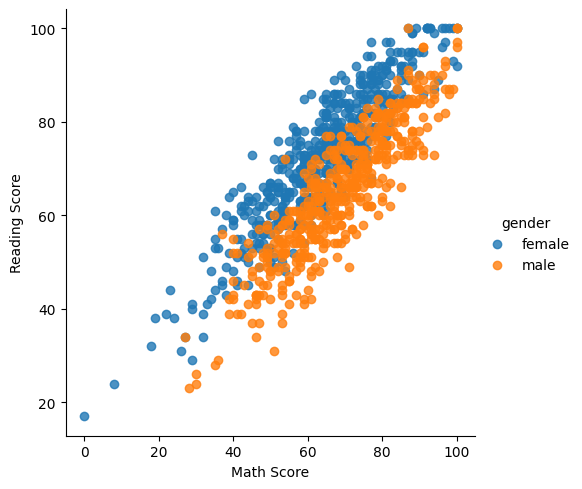

In [6]:
ax = sns.lmplot(\
    x="math score", \
    y="reading score", \
    hue="gender", \
    data=students_performance, \
    fit_reg=False
    )
ax.set_xlabels("Math Score")
ax.set_ylabels("Reading Score")

##Практические задания
№1: Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте
<br>g = # ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
<br>g.xaxis.set_ticks_position('top')
<br>g.xaxis.set_tick_params(rotation=90)

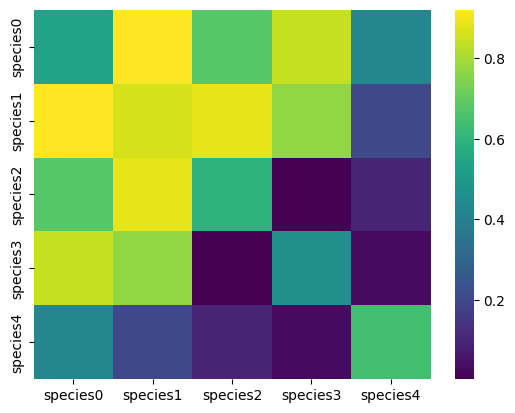

In [7]:
genome_matrix = pd.read_csv("../../../Datasets/genome_matrix.csv", index_col=0)
g = sns.heatmap(data=genome_matrix, cmap="viridis")

№2: Пришло время узнать, кто (самый главный рак) какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2
https://www.opendota.com/

In [8]:
dota_heroes = pd.read_csv("../../../Datasets/dota_hero_stats.csv")
dota_heroes.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [9]:
dota_heroes["role_amount"] = [len(r.split(",")) for r in dota_heroes.roles]
dota_heroes.role_amount.mean()

4.0

№3: Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

In [10]:
iris = pd.read_csv("../../../Datasets/iris.csv")
iris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


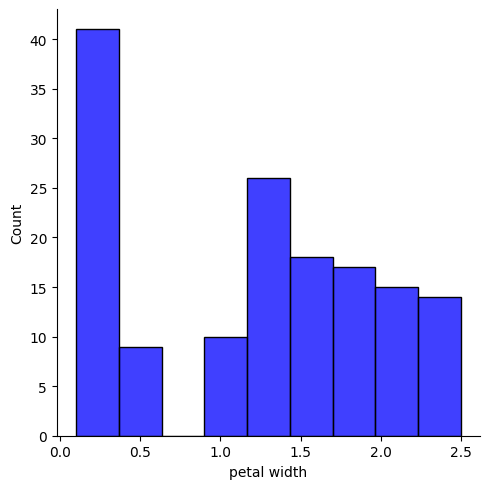

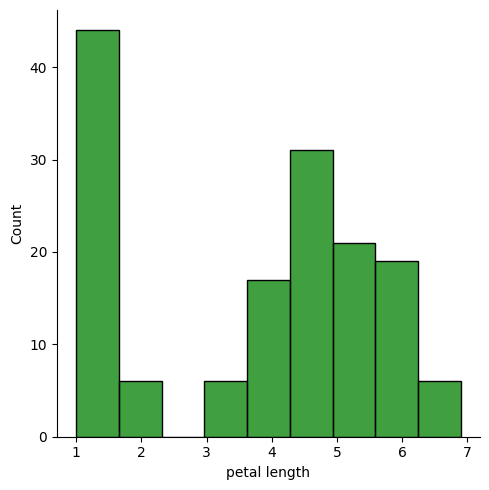

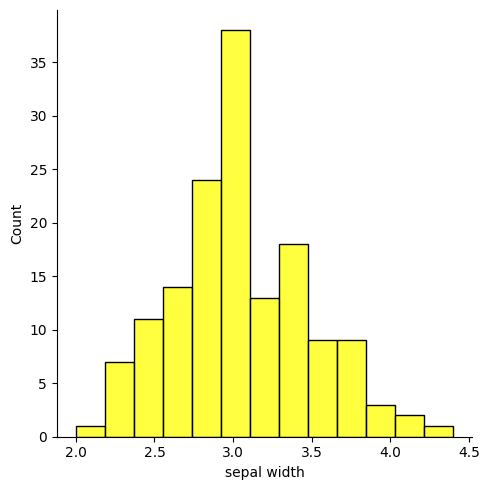

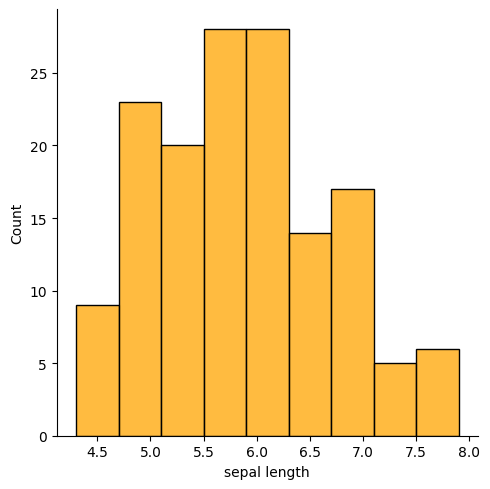

In [11]:
sns.displot(iris['petal width'], color = "blue")
sns.displot(iris['petal length'], color ="green")
sns.displot(iris['sepal width'], color = "yellow")
sns.displot(iris['sepal length'], color = "orange")

№4: Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных. 
https://seaborn.pydata.org/generated/seaborn.violinplot.html

<Axes: >

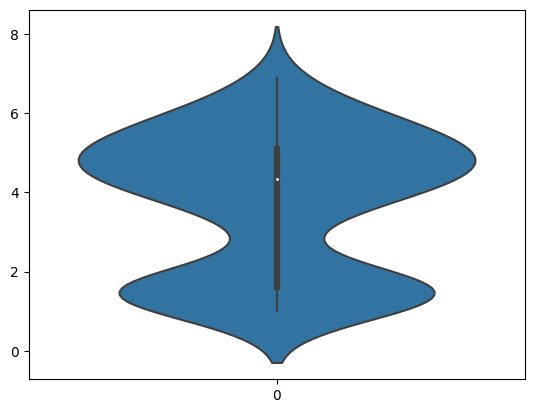

In [12]:
sns.violinplot(data=iris["petal length"])